# Predicting defaults on Lending Club database


- Authors: Beltrán Aller López and Miguel López Garralón
- Date: 13/12/2019
- Email: beltran.aller@cunef.edu and m.lopez@cunef.edu
- Institution: CUNEF
- Version: 1.0

Before doing anything, we will import the necessaries libraries.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.metrics import mean_squared_error # MSE
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb # XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(1122019)
import pickle

The following variable indicates the route in which we have our dataset.

In [2]:
data_path = '../data/TSNE_test_set.csv'

## 1. READING THE DATA

The dataset is kept into the data directory. In the same folder you can find the data dictionary.

In [3]:
loan = pd.read_csv(data_path)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 23 columns):
Component_1                            332020 non-null float64
Component_2                            332020 non-null float64
term_ 36 months                        332020 non-null int64
term_ 60 months                        332020 non-null int64
emp_length_6+ years                    332020 non-null int64
emp_length_<= 5 years                  332020 non-null int64
home_ownership_OTHER                   332020 non-null int64
home_ownership_OWN                     332020 non-null int64
home_ownership_RENT                    332020 non-null int64
verification_status_Not Verified       332020 non-null int64
verification_status_Source Verified    332020 non-null int64
verification_status_Verified           332020 non-null int64
purpose_debt_consolidation             332020 non-null int64
purpose_home                           332020 non-null int64
purpose_investment             

In [5]:
X_test = loan.drop('target',axis = 1).values
Y_test = loan['target'].values

## 2. DEFINING FUNCTIONS

In [6]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

In [7]:
def show_results(test, predict):
    conf_matrix(test, predict)
    print(classification_report(test,predict))

In [8]:
def show_ROC(predict):
    metrics.plot_roc_curve(predict, X_test, Y_test)
    plt.show()                     
    print("Score: ", predict.score(X_test, Y_test))

In [9]:
def load_models(filename):
    with open(filename, 'rb') as file:
        return(pickle.load(file))

## 3. RESULTS

### Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

In [10]:
logit_loan = load_models('../src/Models/WithTSNE/logistic_regression_TSNE')

              precision    recall  f1-score   support

           0       0.87      0.64      0.74    260404
           1       0.33      0.64      0.44     71616

    accuracy                           0.64    332020
   macro avg       0.60      0.64      0.59    332020
weighted avg       0.75      0.64      0.67    332020



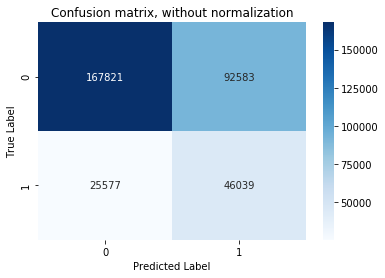

In [11]:
pred_logit = logit_loan.predict(X_test)
conf_matrix(Y_test, pred_logit)
print(classification_report(Y_test, pred_logit))

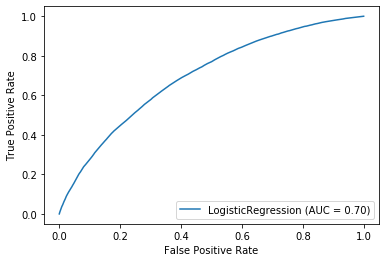

Score:  0.6441178242274562


In [12]:
show_ROC(logit_loan)

### Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [13]:
svm = load_models('../src/Models/WithTSNE/svm_regression_TSNE')

              precision    recall  f1-score   support

           0       0.80      0.55      0.65    260404
           1       0.23      0.50      0.32     71616

    accuracy                           0.54    332020
   macro avg       0.52      0.52      0.48    332020
weighted avg       0.68      0.54      0.58    332020



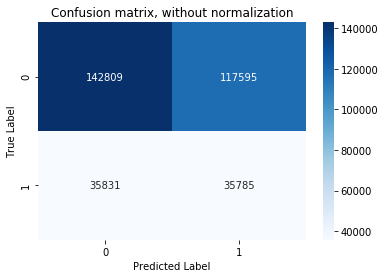

In [14]:
pred_svm = svm.predict(X_test)
conf_matrix(Y_test, pred_svm)
print(classification_report(Y_test,pred_svm))

We will draw the ROC Curve and calculate the area under the ROC Curve to show the results. It also has been compared the score in the prediction between the sample of the train and test parts.

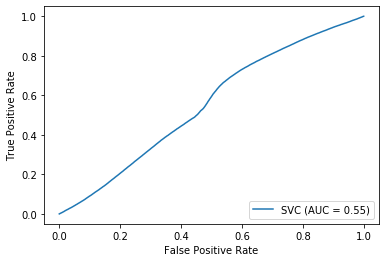

Score:  0.5379013312451058


In [15]:
show_ROC(svm)

### Random Forest

Random Forest, in this case, is a method for classification using an ensamble of many different decision trees. In this method the decision to classify in one class or in other comes frome making the mean of the results of all the decision trees. Random Forest has small variance and is difficult to have overfitting. We use this method because a unique decision tree is so unstable and, for that reason, we train the model with a lot of decision tress.

In [16]:
random_forest = load_models('../src/Models/WithTSNE/random_forest_regression_TSNE')

After that, and once the Random Forest model has been estimated, we predict and show the results through the confussion matrix.

              precision    recall  f1-score   support

           0       0.79      0.97      0.87    260404
           1       0.43      0.09      0.15     71616

    accuracy                           0.78    332020
   macro avg       0.61      0.53      0.51    332020
weighted avg       0.72      0.78      0.72    332020



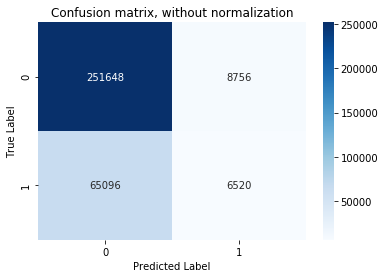

In [17]:
pred_rf = random_forest.predict(X_test)
conf_matrix(Y_test, pred_rf)
print(classification_report(Y_test,pred_rf))

Finally, we show the ROC curve and the area under the curve. Also, it has been compared the score in the prediction between the sample of the train and test parts.

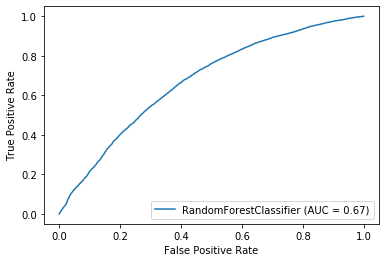

Score:  0.7775676164086501


In [18]:
show_ROC(random_forest)

### XGBoost

XGBoost is a method for classification similar to the Random Forest model, that uses an ensamble of many different decision trees. The difference with the Random Forest is that XGBoost has more variance, it could have problems with overfitting and it usually has more accuracy with less number of estimators. In this method the cases that have failed previously in their classification have more importance for the model, so they are used again in next samples to try to classify them correctly.

In [19]:
xgb = load_models('../src/Models/WithTSNE/xgboost_regression_TSNE')

Once the XGBoost model has been estimated, we predict and show the results through the confussion matrix.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    260404
           1       0.32      0.00      0.01     71616

    accuracy                           0.78    332020
   macro avg       0.55      0.50      0.44    332020
weighted avg       0.69      0.78      0.69    332020



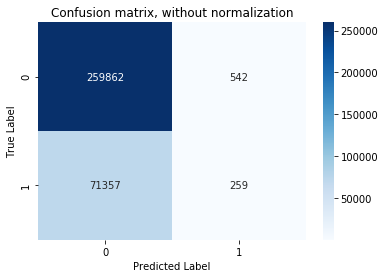

In [20]:
pred_xgb = xgb.predict(X_test)
conf_matrix(Y_test, pred_xgb)
print(classification_report(Y_test,pred_xgb))

Finally, we show the ROC curve and the area under the curve. Also, it has been compared the score in the prediction between the sample of the train and test parts.

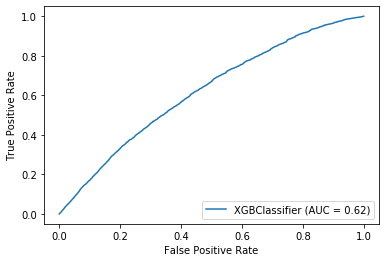

Score:  0.7834497921811939


In [21]:
show_ROC(xgb)

# ROC Curve comparisson

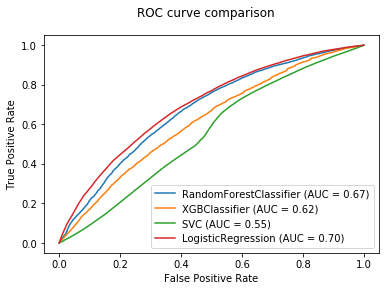

In [22]:
loan_RandomForest_disp = plot_roc_curve(random_forest, X_test, Y_test)
loan_XGBoost_disp = plot_roc_curve(xgb, X_test, Y_test, ax=loan_RandomForest_disp.ax_)
loan_SVM2_disp = plot_roc_curve(svm, X_test, Y_test, ax=loan_XGBoost_disp.ax_)
loan_LR_disp = plot_roc_curve(logit_loan, X_test, Y_test, ax=loan_SVM2_disp.ax_)
loan_RandomForest_disp.figure_.suptitle("ROC curve comparison")
plt.show()

In [23]:
print('Logistic Regression')
print(classification_report(Y_test,pred_logit))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logit_loan.score(X_test, Y_test)))
print('')
print('Support Vector Machine')
print(classification_report(Y_test,pred_svm))
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(svm.score(X_test, Y_test)))
print('')
print('Random Forest')
print(classification_report(Y_test,pred_rf))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(random_forest.score(X_test, Y_test)))
print('')
print('XGBoost')
print(classification_report(Y_test,pred_xgb))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test, Y_test)))
print('')

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.64      0.74    260404
           1       0.33      0.64      0.44     71616

    accuracy                           0.64    332020
   macro avg       0.60      0.64      0.59    332020
weighted avg       0.75      0.64      0.67    332020

Accuracy of Logistic Regression classifier on test set: 0.64

Support Vector Machine
              precision    recall  f1-score   support

           0       0.80      0.55      0.65    260404
           1       0.23      0.50      0.32     71616

    accuracy                           0.54    332020
   macro avg       0.52      0.52      0.48    332020
weighted avg       0.68      0.54      0.58    332020

Accuracy of Support Vector Machine classifier on test set: 0.54

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.97      0.87    260404
           1       0.43      0.09      0.15     71616

# Conclusions



The number of the variables in the dataset was so big and, for that reason, we decided to use diferent libraries to solve those problems, always setting differents parameters as limits for deleting cases and other decisions. Also, we applied a PCA analysis to reduce the number of variables in the dataset.

We used the following methods to predict the people who can make default.

1. Logistic Regression
2. Support Vector Machine
3. Random Forest
4. XGBoost

The results between those models were so differents. The worst model was the Support Vector Machine, following by the Logistic Regression. The best model is the Random Forest, with an accuracy of 0.78 and a F1-score of the default cases of 0.15, with an AUC of 0.67.

If we compare this results with the Random Forest result of the PCA method without doing t-SNE, we have to choose the last one. The Random Forest Model without doing t-SNE over the dataset with the 21 components of doing the PCA has more accuracy and f1-score.

# References:

- Sklearn:
    1. SearchGridCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    2. Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    3. Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    4. SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    5. Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    6. XGBoost: https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn


